## Monte Carlo simulation
Imagine you are asked to estimate the average distance between randomly placed points within a unit square (see figure below). Describe the python workflow that you would use to estimate the average distance between two randomly placed points within the unit square

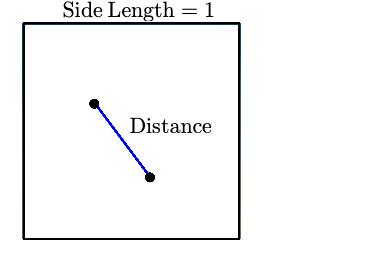

### 1) Construct the Unit Square Domain and populate with random particles:

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Number of particles
N = 10

# Random number for the particle positions
numbers = np.random.rand(2*N)

#print(numbers.shape)
# Random (x, y) Positions
particles = numbers.reshape(N,2)

#print(particles)

[[0.07427343 0.67562544]
 [0.49922136 0.1856813 ]
 [0.89318096 0.44694282]
 [0.44268812 0.32865026]
 [0.58173315 0.93353129]
 [0.80157603 0.78021588]
 [0.73784289 0.78106178]
 [0.49603863 0.13459077]
 [0.75779134 0.95028775]
 [0.11136215 0.22811495]]


### Domain:

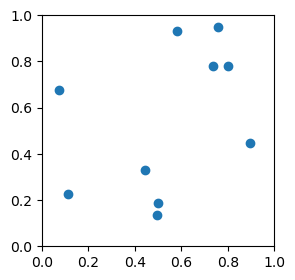

In [23]:
plt.figure(figsize=(3,3))

plt.scatter(particles[:,0], particles[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

### 2) Estimate distances (only for consecutive particles):

In [33]:
# Empty list to store distances

d_list = []

# Loop over all particles

for j in range(particles.shape[0] - 1):

    #print(j)
    # Delta x
    delta_x = particles[j + 1][0] - particles[j][0]
    # Delta y
    delta_y = particles[j + 1][1] - particles[j][1]

    # Overall Euclidean distance
    d_list.append(np.sqrt(delta_x**2 + delta_y**2))

d_list = np.array(d_list)

#print(d_list.shape)


### 3) Average distance considering particles at random positions

In [34]:
# Mean distance
m_d = np.mean(d_list)

print(m_d)

0.5617294691108043


### 4) Aggregate the results and study convergence

In [71]:
def mean_distance(N, s):
    """
    Input:
    N -> Number of particles
    s -> Random generator seed
    """
    # Fix seed:
    np.random.seed(s)
        
    # Random number for the particle positions
    numbers = np.random.rand(2*N)
    
    #print(numbers.shape)
    # Random (x, y) Positions
    particles = numbers.reshape(N,2)
    
    #print(particles)

    # Empty list to store distances
    d_list = []

    # Loop over all particles

    for j in range(particles.shape[0] - 1):
    
        #print(j)
        # Delta x
        delta_x = particles[j + 1][0] - particles[j][0]
        # Delta y
        delta_y = particles[j + 1][1] - particles[j][1]
    
        # Overall Euclidean distance
        d_list.append(np.sqrt(delta_x**2 + delta_y**2))
    
    d_list = np.array(d_list)

    # Mean distance
    m_d = np.mean(d_list)

    return m_d

In [72]:
# Double checking
mean_distance(100, 123)

0.5146923148978282

In [79]:
# Seeds 
seed_1 = 123
seed_2 = 1427

# Empty lists:
n_list = []
m_list1 = []
m_list2 = []

# Global samples
k = 25

# For loop
for j in range(1,k+1):
    n_list.append(2**j)
    m_list1.append(mean_distance(2**j, seed_1))
    m_list2.append(mean_distance(2**j, seed_2))

# Convert to arrays
n_list = np.array(n_list)
m_list1 = np.array(m_list1)
m_list2 = np.array(m_list2)

In [80]:
#np.log2(1e6)

In [83]:
#print(n_list)
print(m_list1)
print(m_list2.shape)

[0.53931329 0.47272374 0.53101041 0.45056559 0.44448361 0.48800297
 0.53959889 0.53212342 0.52471532 0.53282829 0.52647872 0.52013941
 0.52085708 0.52031375 0.52239297 0.52066182 0.52020726 0.52048739
 0.52084763 0.52092813 0.5211405  0.52116821 0.52137009 0.52141602
 0.52139156]
(25,)


### Convergence plot

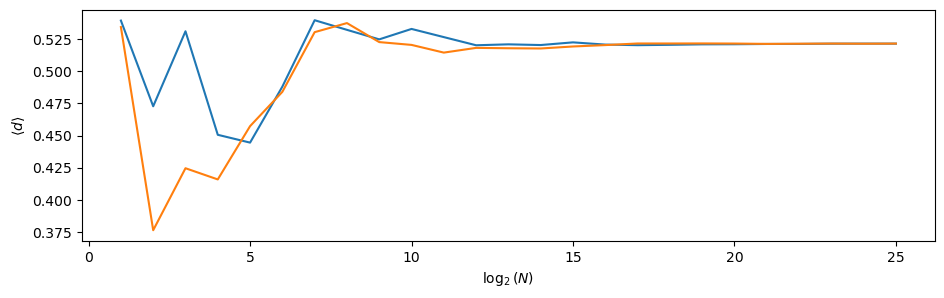

In [84]:
plt.figure(figsize=(11,3))

plt.plot(np.log2(n_list), m_list1)
plt.plot(np.log2(n_list), m_list2)

plt.xlabel(r"$\log_2(N)$")
plt.ylabel(r"$\langle d \rangle$")

plt.show()

### 2nd manner:

In [91]:
def mean_distance_2(N, s):
    """
    Input:
    N -> Number of particles
    s -> Random generator seed
    """
    # Fix seed:
    np.random.seed(s)
        
    # Random number for the particle positions
    part_left  = np.random.random((N, 2))
    part_right = np.random.random((N, 2))

    # Empty list to store distances
    d_part = np.sqrt(np.sum((part_left - part_right)**2, axis = 1))

    # Mean distance
    m_d = np.mean(d_part)

    return m_d

In [94]:
mean_distance_2(100, 123)

0.511517813683912

In [97]:
# Seeds 
seed_3 = 123456675
seed_4 = 1090389

# Empty lists:
n_list = []
m_list3 = []
m_list4 = []

# Global samples
k = 25

# For loop
for j in range(1,k+1):
    n_list.append(2**j)
    m_list3.append(mean_distance_2(2**j, seed_3))
    m_list4.append(mean_distance_2(2**j, seed_4))

# Convert to arrays
n_list = np.array(n_list)
m_list3 = np.array(m_list3)
m_list4 = np.array(m_list4)

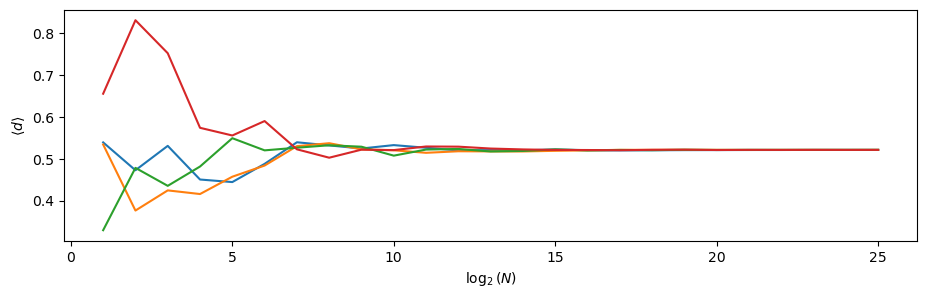

In [98]:
plt.figure(figsize=(11,3))

plt.plot(np.log2(n_list), m_list1)
plt.plot(np.log2(n_list), m_list2)

plt.plot(np.log2(n_list), m_list3)
plt.plot(np.log2(n_list), m_list4)

plt.xlabel(r"$\log_2(N)$")
plt.ylabel(r"$\langle d \rangle$")

plt.show()